<a href="https://colab.research.google.com/github/That1GuyWSSC/IA2024_16/blob/master/Kmeans_IPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Script de Análise e Agrupamento de Dados de Propriedades Imobiliárias
---------------------------------------------------------------------
Este script realiza o agrupamento (clustering) das propriedades utilizando
o algoritmo K-Means. O objetivo é identificar padrões ou grupos de imóveis
com base nas principais variáveis, como tamanho (squareMeters), número de
quartos (numberOfRooms), presença de piscina, quintal, entre outros.
Além disso, inclui análises complementares como segmentação de mercado e
características regionais, bem como possíveis padrões de construção.


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
dataset = pd.read_csv('/content/sample_data/ParisHousingClass.csv')

In [ ]:
variaveis_em_estudo = ['squareMeters', 'numberOfRooms', 'price']
X = dataset[variaveis_em_estudo]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
inercias = []
k_range = range(1, 11)

for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=1234)
    kmeans_temp.fit(X_scaled)
    inercias.append(kmeans_temp.inertia_)



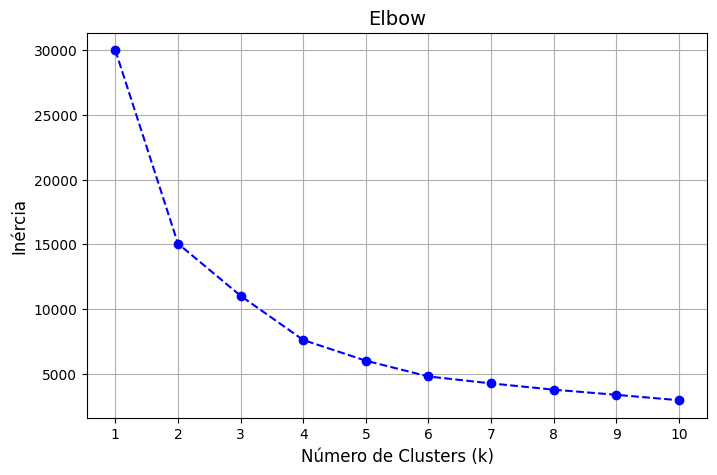

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inercias, marker='o', linestyle='--', color='b')
plt.title('Elbow', fontsize=14)
plt.xlabel('Número de Clusters (k)', fontsize=12)
plt.ylabel('Inércia', fontsize=12)
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [18]:
# Baseado no gráfico, escolhemos k=4
k_optimal = 4

# Aplicar o K-Means
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [19]:
dataset['cluster'] = clusters

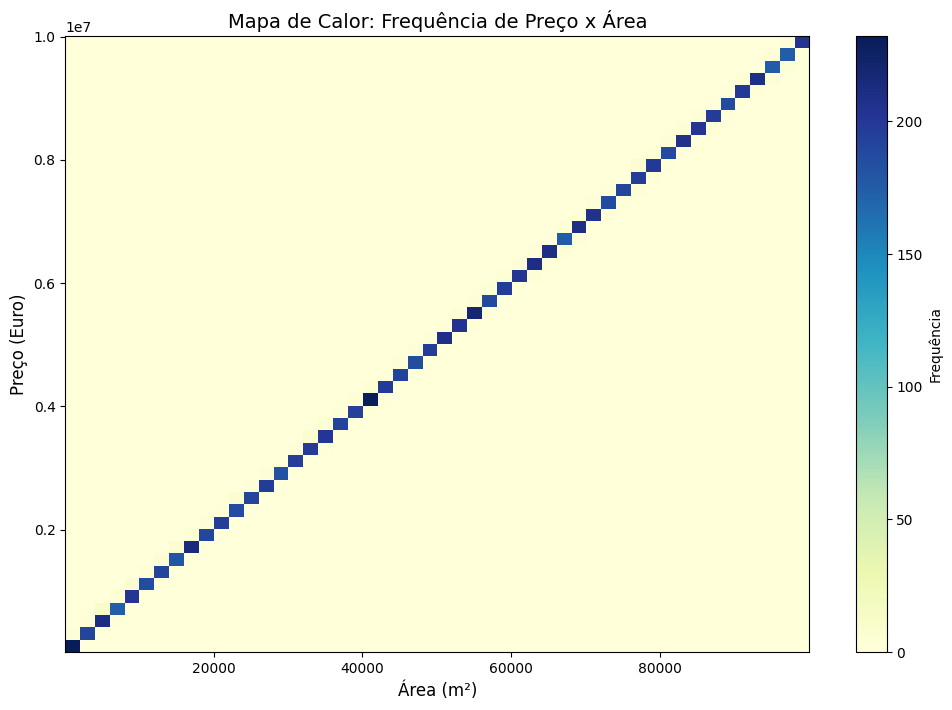

In [20]:
# Criar um mapa de calor baseado na frequência
heatmap_data, xedges, yedges = np.histogram2d(
    dataset['squareMeters'],
    dataset['price'],
    bins=(50, 50)  # Ajustar o número de bins para controlar a granularidade
)

plt.figure(figsize=(12, 8))
plt.imshow(
    heatmap_data.T,  # Transpor para alinhar os eixos corretamente
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    origin='lower',
    aspect='auto',
    cmap='YlGnBu'  # Paleta de cores
)
plt.colorbar(label='Frequência')
plt.title('Mapa de Calor: Frequência de Preço x Área', fontsize=14)
plt.xlabel('Área (m²)', fontsize=12)
plt.ylabel('Preço (Euro)', fontsize=12)
plt.grid(False)  # Grid removido para visualização limpa
plt.show()




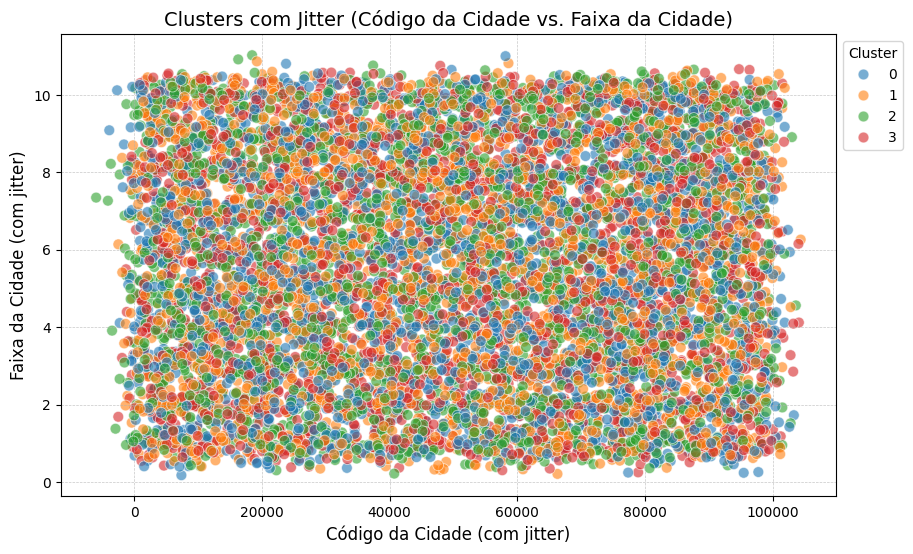

In [21]:
# Aplicando jitter para reduzir sobreposição
dataset['cityCode_jitter'] = dataset['cityCode'] + np.random.normal(0, 2000, dataset.shape[0])
dataset['cityPartRange_jitter'] = dataset['cityPartRange'] + np.random.normal(0, 0.3, dataset.shape[0])

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=dataset['cityCode_jitter'],
    y=dataset['cityPartRange_jitter'],
    hue=dataset['cluster'],
    palette='tab10',
    alpha=0.6,
    s=60
)
plt.title('Clusters com Jitter (Código da Cidade vs. Faixa da Cidade)', fontsize=14)
plt.xlabel('Código da Cidade (com jitter)', fontsize=12)
plt.ylabel('Faixa da Cidade (com jitter)', fontsize=12)
plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()


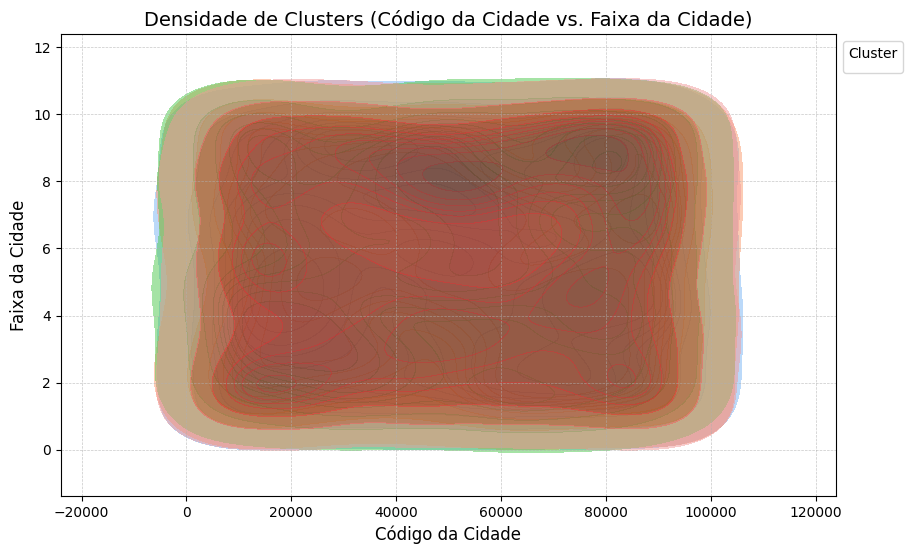

In [22]:
# Gráfico de densidade bidimensional (kdeplot)
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=dataset,
    x='cityCode',
    y='cityPartRange',
    hue='cluster',
    fill=True,  # Áreas preenchidas para densidade
    palette='tab10',
    alpha=0.5
)
plt.title('Densidade de Clusters (Código da Cidade vs. Faixa da Cidade)', fontsize=14)
plt.xlabel('Código da Cidade', fontsize=12)
plt.ylabel('Faixa da Cidade', fontsize=12)
plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()


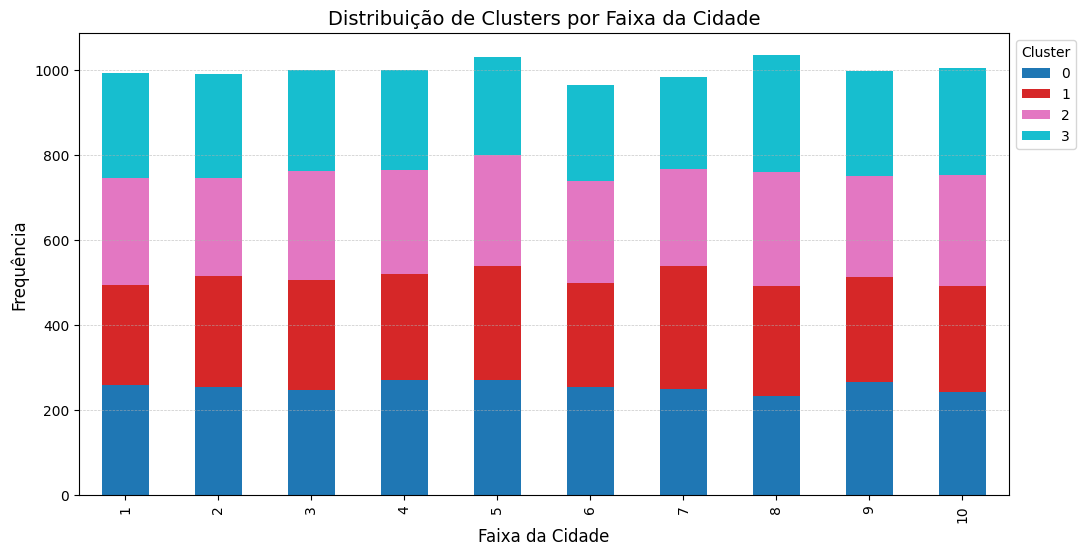

In [23]:

cluster_citypart_counts = dataset.groupby(['cluster', 'cityPartRange']).size().unstack(fill_value=0)

cluster_citypart_counts.T.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='tab10'
)
plt.title('Distribuição de Clusters por Faixa da Cidade', fontsize=14)
plt.xlabel('Faixa da Cidade', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()


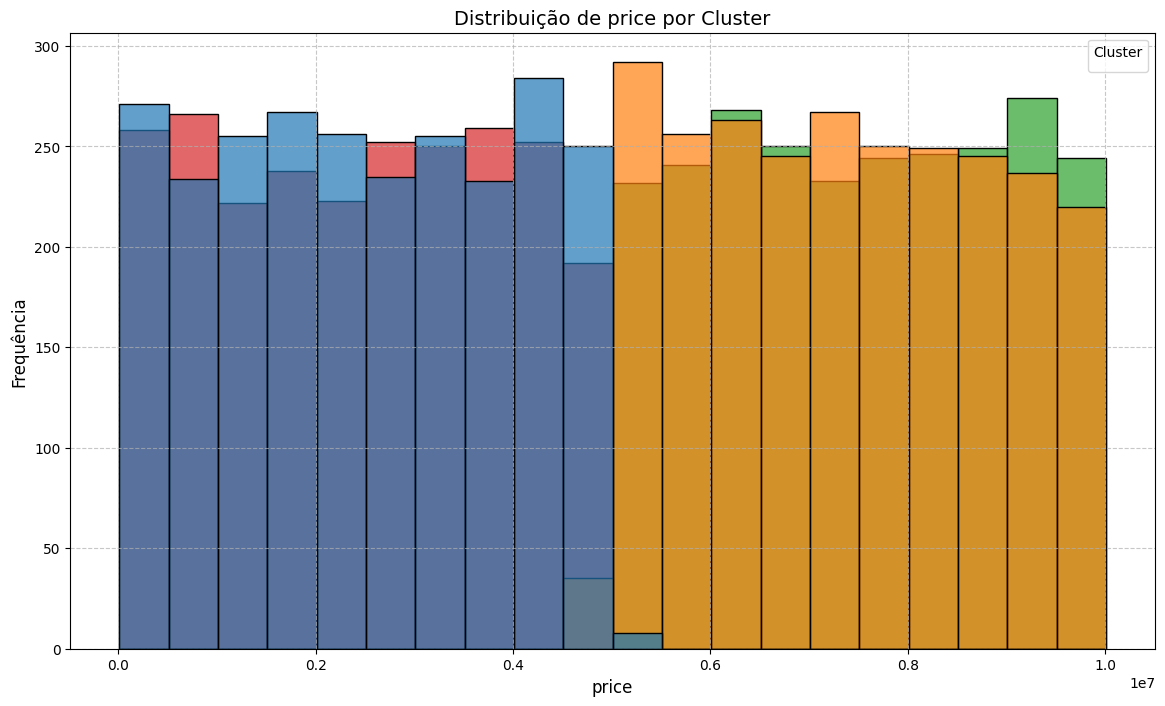

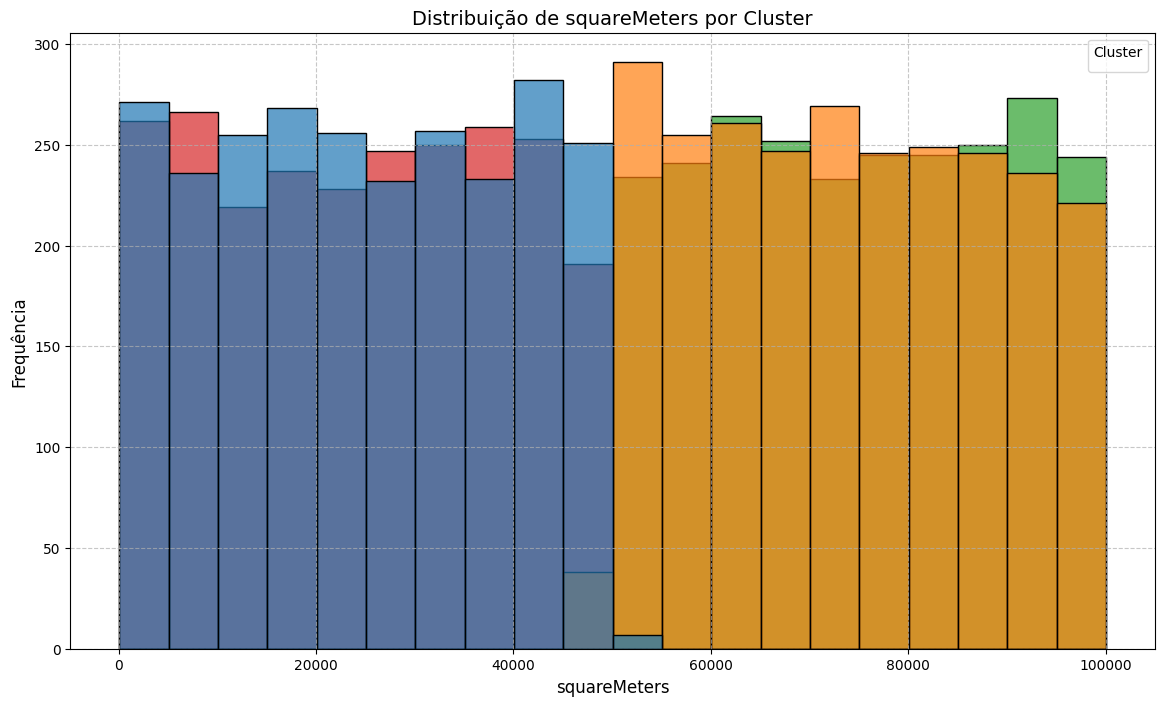

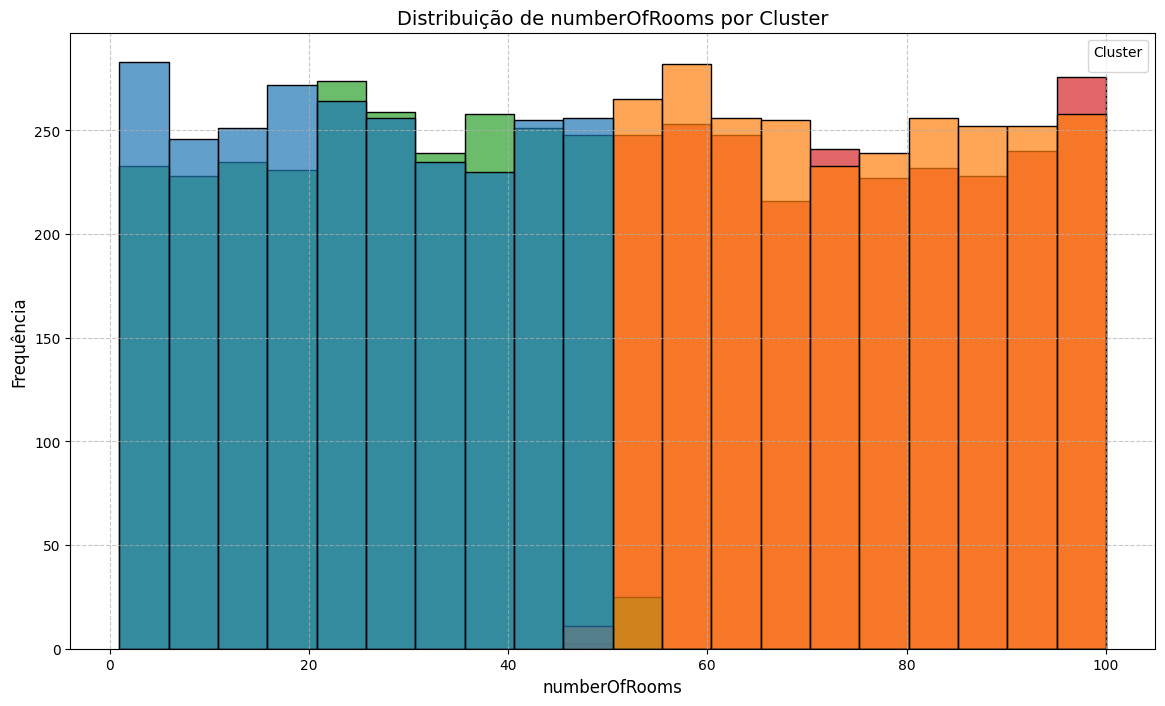

In [25]:
# Histogramas separados para cada cluster
for variable in variables_to_plot:
    plt.figure(figsize=(14, 8))
    sns.histplot(
        data=dataset,
        x=variable,
        hue='cluster',
        multiple='layer',  # Overlapping histograms
        palette='tab10',
        bins=20,
        alpha=0.7
    )
    plt.title(f'Distribuição de {variable} por Cluster', fontsize=14)
    plt.xlabel(variable, fontsize=12)
    plt.ylabel('Frequência', fontsize=12)
    plt.legend(title='Cluster', loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


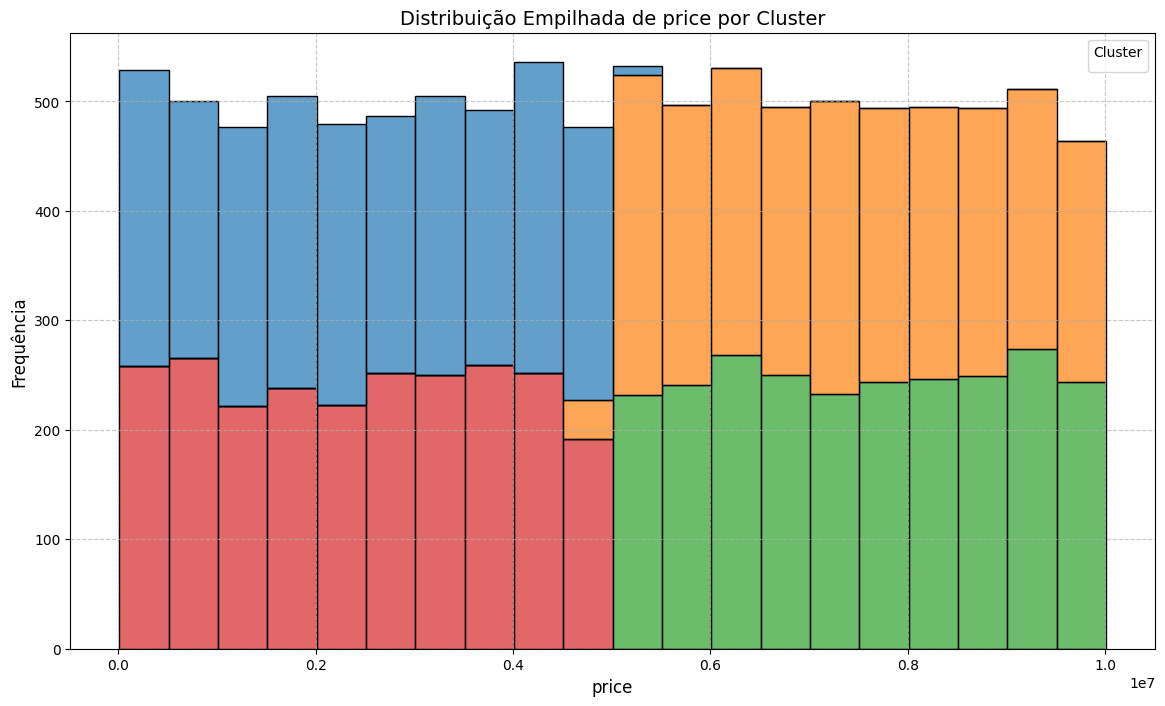

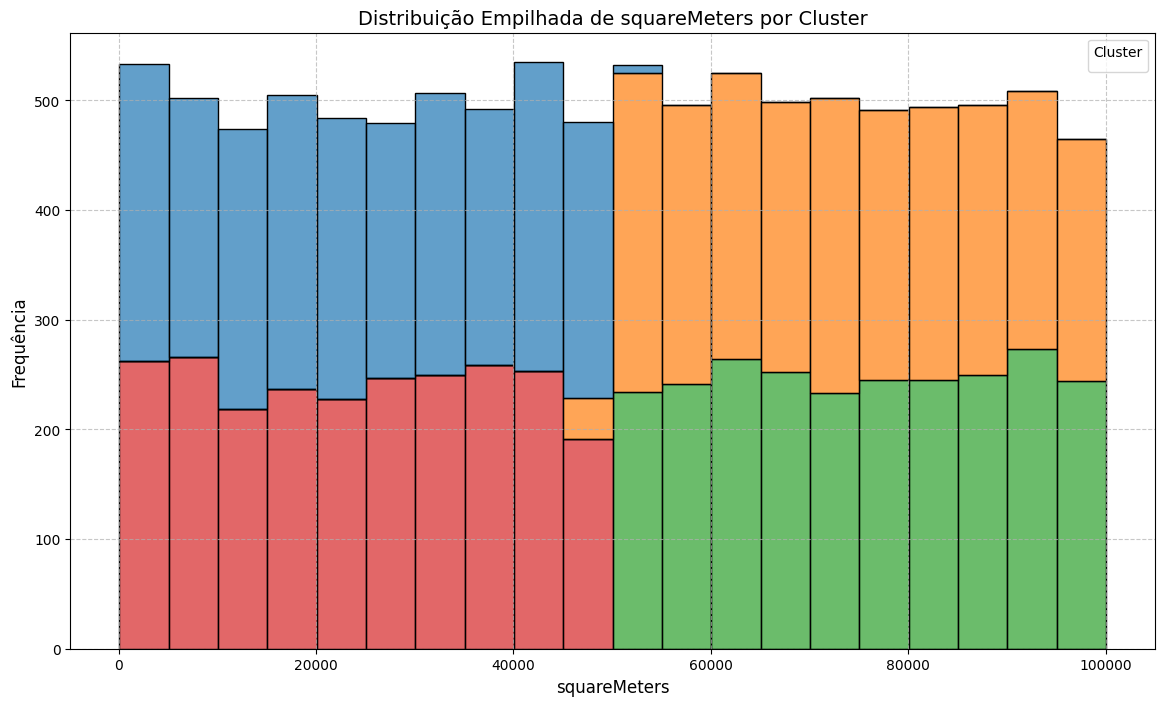

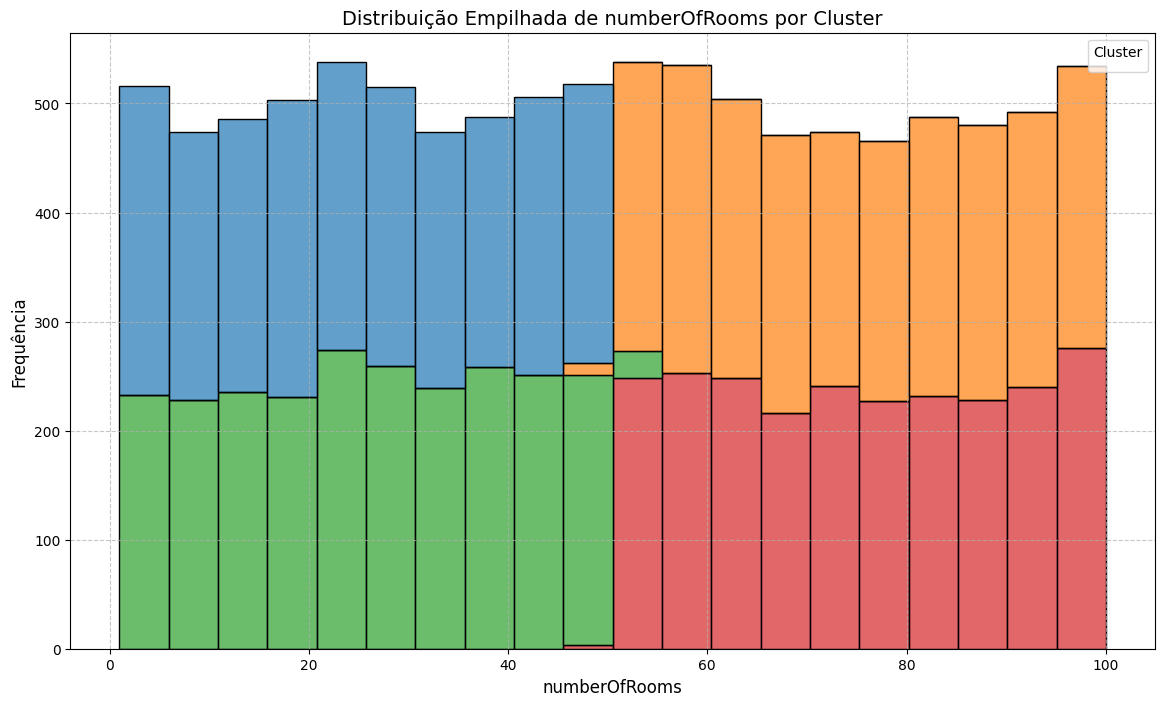

In [26]:
# Histogramas empilhados para cada variável
for variable in variables_to_plot:
    plt.figure(figsize=(14, 8))
    sns.histplot(
        data=dataset,
        x=variable,
        hue='cluster',
        multiple='stack',  # Stacked histograms
        palette='tab10',
        bins=20,
        alpha=0.7
    )
    plt.title(f'Distribuição Empilhada de {variable} por Cluster', fontsize=14)
    plt.xlabel(variable, fontsize=12)
    plt.ylabel('Frequência', fontsize=12)
    plt.legend(title='Cluster', loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


<ipython-input-27-934b81aa6633>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


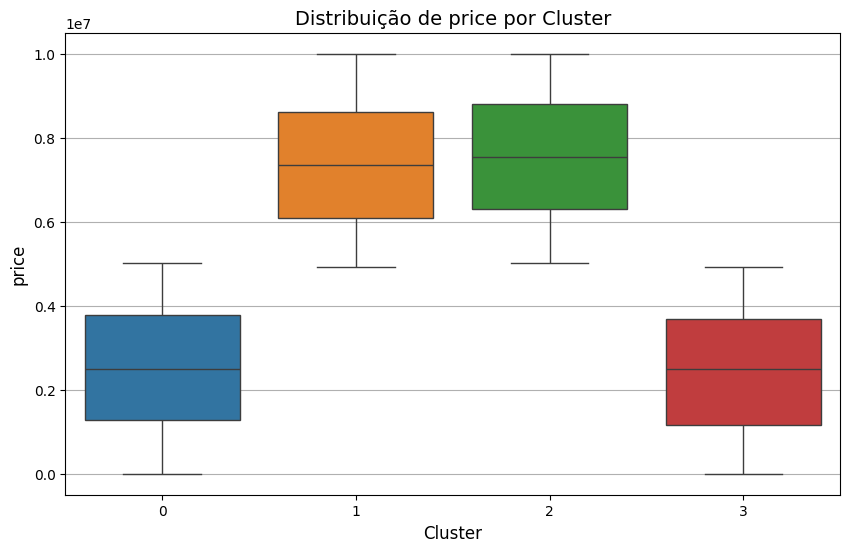

<ipython-input-27-934b81aa6633>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


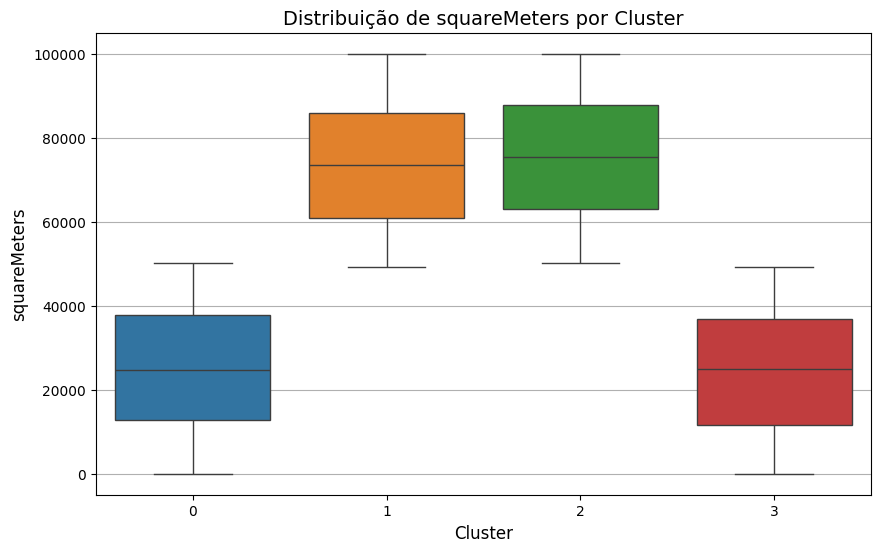

<ipython-input-27-934b81aa6633>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


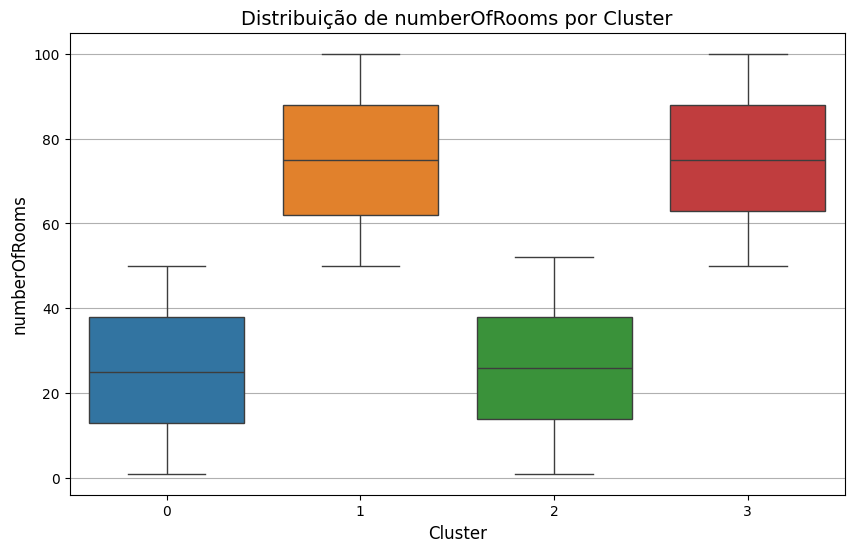

In [27]:
# Boxplots para variáveis selecionadas
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        data=dataset,
        x='cluster',
        y=variable,
        palette='tab10'
    )
    plt.title(f'Distribuição de {variable} por Cluster', fontsize=14)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel(variable, fontsize=12)
    plt.grid(axis='y')
    plt.show()